In [20]:
import numpy as np
import scipy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
# 目标函数𝑦=𝑠𝑖𝑛2𝜋𝑥——在几个频率值下测试：1,2,3,9
def real_func(x,freq=2):
    #return np.sin(2*np.pi*x)
    #return np.sin(2*2*np.pi*x)
    return np.sin(freq*2*np.pi*x)
    #return np.sin(8*2*np.pi*x)

# 多项式
def fit_func(p, x):
    f = np.poly1d(p)
    return f(x)

# 残差
def residuals_func(p, x, y):
    ret = fit_func(p, x) - y
    return ret

def fitting(freq_label,variance_label,x,y,M=0):
    """
    M    为 多项式的次数
    """
    # 随机初始化多项式参数
    import matplotlib.pyplot as plt
    p_init = np.random.rand(M + 1)
    # 最小二乘法
    p_lsq = leastsq(residuals_func, p_init, args=(x, y))
#     print('Fitting Parameters:', p_lsq[0])

    # 可视化
    plt.title("frequence=" + freq_label + " variance=" + variance_label + " M=" + str(M))
    plt.plot(x_points, real_func(x_points), label='real')
    plt.plot(x_points, fit_func(p_lsq[0], x_points), label='fitted curve')
    plt.plot(x, y, 'bo', label='noise')
    plt.legend()
    return p_lsq

In [22]:
x = np.linspace(0, 1, 200)
x_points = np.linspace(0, 1, 1000)

/Applications/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:449: RuntimeWarning: Number of calls to function has reached maxfev = 36400.
  warnings.warn(errors[info][0], RuntimeWarning)


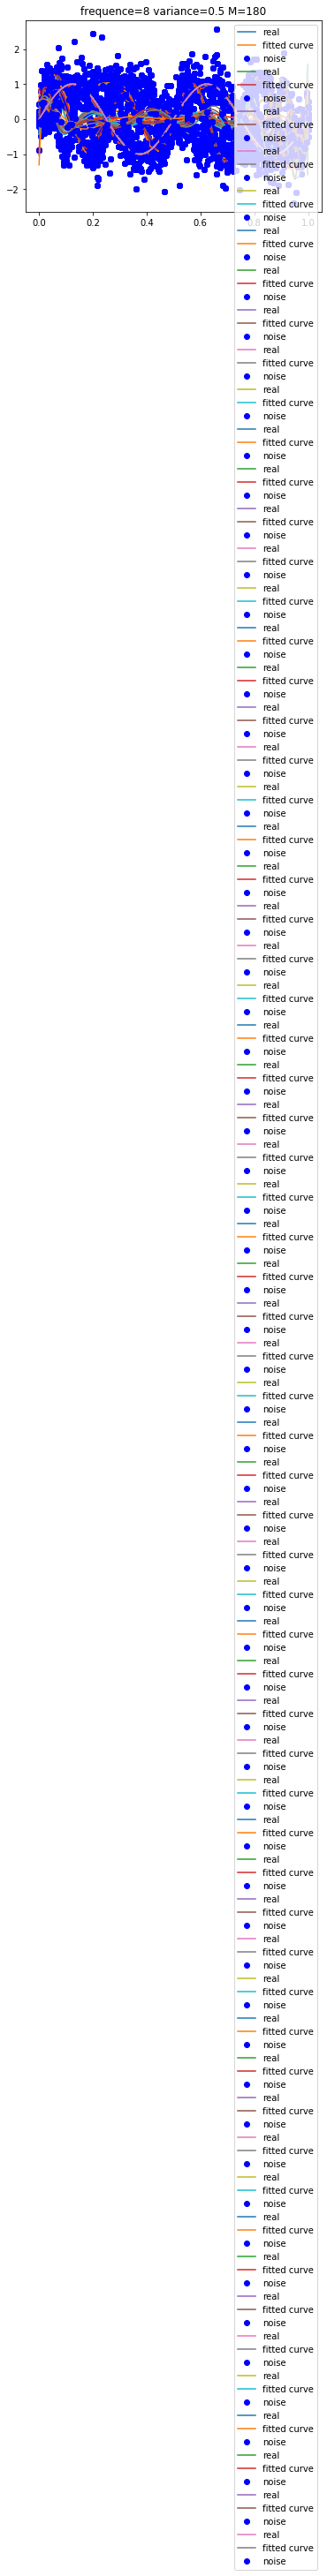

In [14]:
freqs = [1,2,4,8]
variances = [0.1,0.2,0.3,0.5]
M = [10,30,50,180]
for freq in freqs:
    for variance in variances:
        y_ = real_func(x, freq)
        y = [np.random.normal(0, variance) + y1 for y1 in y_]
        for m in M:
            fitting(str(freq),str(variance),x,y,m)

(array([0.00452176]), 1)

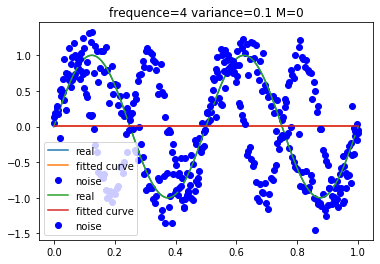

In [24]:
freq = 2
variance = 0.2
y_ = real_func(x, freq)
y = [np.random.normal(0, variance) + y1 for y1 in y_]
fitting(str(freq),str(variance),x,y)
freq = 4
variance = 0.1
y_ = real_func(x, freq)
y = [np.random.normal(0, variance) + y1 for y1 in y_]
fitting(str(freq),str(variance),x,y)

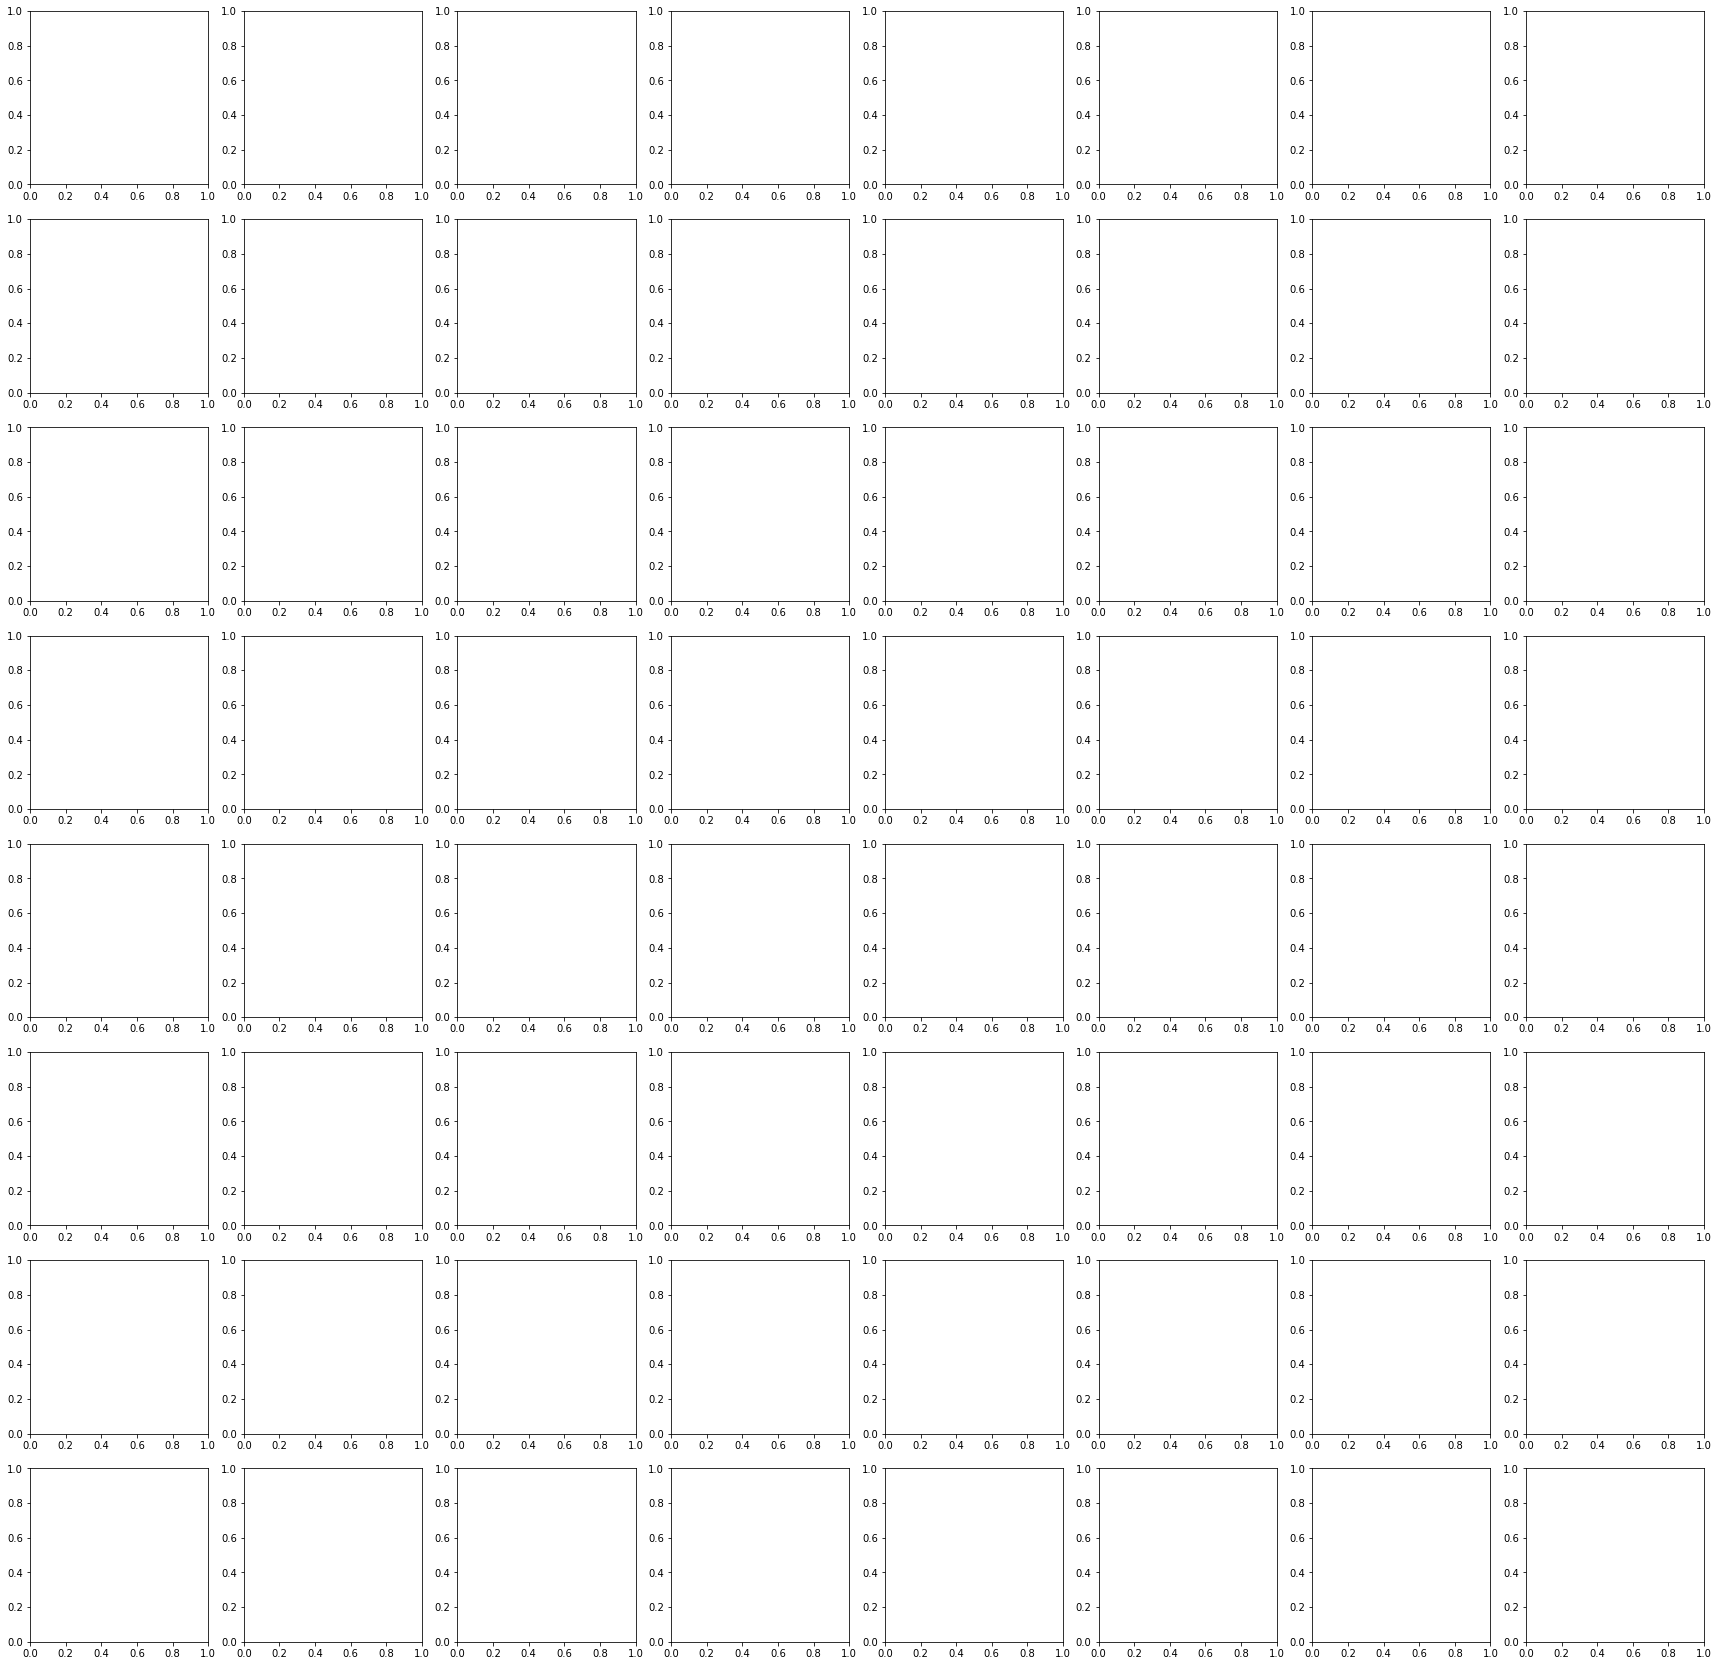

In [37]:
plt.figure(figsize=(30,30))
for i in range(64):
    plt.subplot(8,8,i+1)

In [62]:
plt.figure(figsize=(20,20))
# 目标函数𝑦=𝑠𝑖𝑛2𝜋𝑥——在几个频率值下测试：1,2,3,9
def real_func(x,freq=2):
    #return np.sin(2*np.pi*x)
    #return np.sin(2*2*np.pi*x)
    return np.sin(freq*2*np.pi*x)
    #return np.sin(8*2*np.pi*x)

# 多项式
def fit_func(p, x):
    f = np.poly1d(p)
    return f(x)

# 残差
def residuals_func(p, x, y):
    ret = fit_func(p, x) - y
    return ret

def fitting(freq_label,variance_label,x,y,M=0):
    """
    M    为 多项式的次数
    """
    # 随机初始化多项式参数
    import matplotlib.pyplot as plt
    p_init = np.random.rand(M + 1)
    # 最小二乘法
    p_lsq = leastsq(residuals_func, p_init, args=(x, y))
#     print('Fitting Parameters:', p_lsq[0])

    # 可视化
#     plt.subplot(1,1,1+subpolt_index)
    plt.title("frequence=" + freq_label + " variance=" + variance_label + " M=" + str(M))
    plt.plot(x_points, real_func(x_points), label='real')
    plt.plot(x_points, fit_func(p_lsq[0], x_points), label='fitted curve')
    plt.plot(x, y, 'bo', label='noise')
    plt.legend()
    return p_lsq

<Figure size 1440x1440 with 0 Axes>

(array([-0.44259225,  0.21721048]), 3)

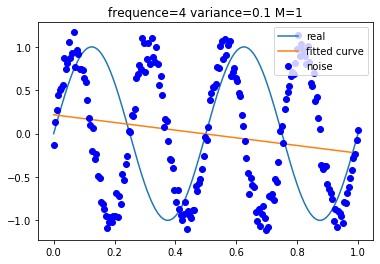

In [67]:
freq = 2
variance = 0.2
M=0
y_ = real_func(x, freq)
y = [np.random.normal(0, variance) + y1 for y1 in y_]
fitting(str(freq),str(variance),x,y,0)
plt.savefig(fname="./pics/"+"Freq="+str(freq)+" Var="+str(variance)+" M="+str(M)+".png",figsize=[10,10])
plt.cla()
freq = 4
variance = 0.1
y_ = real_func(x, freq)
y = [np.random.normal(0, variance) + y1 for y1 in y_]
fitting(str(freq),str(variance),x,y,1)